## Data retrieval and cleaning

In [1]:
from ift6758.data.acquisition import NHLGameData
from ift6758.data.cleaning import DataCleaner

data_path_raw = './../../ift6758/data/json_raw/'
nhl_games_data = NHLGameData(data_path_raw)
for year in range(2016,2021):
    nhl_games_data.fetch_season(year)
    
data_path_clean = './../../ift6758/data/json_clean/'
data_cleaner = DataCleaner(data_raw=nhl_games_data, data_path_clean=data_path_clean)
for year in range(2016,2021):
    data_cleaner.clean_season(year)

Loading from cache file ./../../ift6758/data/json_raw/2016/2016-regular.pkl
Found 1230 regular games for season 2016-2017
Loading from cache file ./../../ift6758/data/json_raw/2016/2016-playoff.pkl
Found 102 playoff games for season 2016-2017
Loading from cache file ./../../ift6758/data/json_raw/2017/2017-regular.pkl
Found 1271 regular games for season 2017-2018
Loading from cache file ./../../ift6758/data/json_raw/2017/2017-playoff.pkl
Found 105 playoff games for season 2017-2018
Loading from cache file ./../../ift6758/data/json_raw/2018/2018-regular.pkl
Found 1271 regular games for season 2018-2019
Loading from cache file ./../../ift6758/data/json_raw/2018/2018-playoff.pkl
Found 105 playoff games for season 2018-2019
Loading from cache file ./../../ift6758/data/json_raw/2019/2019-regular.pkl
Found 1271 regular games for season 2019-2020
Loading from cache file ./../../ift6758/data/json_raw/2019/2019-playoff.pkl
Found 105 playoff games for season 2019-2020
Loading from cache file ./..

## Feature engineering

In [2]:
from ift6758.features import FeatureEng
data_path_clean = './../../ift6758/data/json_clean/'
w = FeatureEng(data_path_clean)

In [3]:
df = w.features_1(2016,2020)
df

,empty_net,is_goal,distance_goal,angle_shot
0,0,0,13.93,21.034961
1,0,0,13.60,72.917417
2,0,0,77.03,-29.558654
3,0,0,58.94,-14.743729
4,0,0,62.61,26.565007
...,...,...,...,...
298075,0,0,26.42,-60.522920
298076,0,0,40.50,69.763292
298077,0,0,14.87,42.259920
298078,0,0,11.40,-37.881841


In [4]:
w.getTestSet(2020)

,game_id,period,period_time,type,team,x,y,shooter,goalie,shot_type,empty_net,strength,opposite_team_side
0,2020020001,1,00:16,SHOT,Philadelphia Flyers,-74.0,29.0,Travis Konecny,Tristan Jarry,Wrist Shot,False,None,left
1,2020020001,1,00:34,SHOT,Pittsburgh Penguins,49.0,-25.0,Evan Rodrigues,Carter Hart,Wrist Shot,False,None,right
2,2020020001,1,01:05,SHOT,Philadelphia Flyers,-52.0,-31.0,Joel Farabee,Tristan Jarry,Backhand,False,None,left
3,2020020001,1,02:51,SHOT,Pittsburgh Penguins,43.0,39.0,Evan Rodrigues,Carter Hart,Snap Shot,False,None,right
4,2020020001,1,03:44,SHOT,Philadelphia Flyers,-53.0,8.0,Claude Giroux,Tristan Jarry,Slap Shot,False,None,left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55459,2020030415,3,16:19,SHOT,Tampa Bay Lightning,57.0,30.0,Blake Coleman,Carey Price,Wrist Shot,False,None,right
55460,2020030415,3,17:13,SHOT,Tampa Bay Lightning,56.0,-31.0,Mikhail Sergachev,Carey Price,Backhand,False,None,right
55461,2020030415,3,19:01,SHOT,Montréal Canadiens,-45.0,-14.0,Tyler Toffoli,Andrei Vasilevskiy,Wrist Shot,False,None,left
55462,2020030415,3,19:10,SHOT,Montréal Canadiens,-77.0,-3.0,Cole Caufield,Andrei Vasilevskiy,Backhand,False,None,left


In [5]:
goals = df[df['is_goal']==1]
goals

,empty_net,is_goal,distance_goal,angle_shot
6,0,1,20.02,2.863118
11,0,1,8.54,20.566119
14,0,1,56.01,-1.023011
15,0,1,31.30,-63.453083
24,0,1,19.80,-44.997077
...,...,...,...,...
298015,0,1,24.08,41.640285
298022,0,1,11.18,-10.305163
298058,0,1,5.66,-44.968165
298066,0,1,31.89,41.186613


In [6]:
shots = df[df['is_goal']==0]
shots

,empty_net,is_goal,distance_goal,angle_shot
0,0,0,13.93,21.034961
1,0,0,13.60,72.917417
2,0,0,77.03,-29.558654
3,0,0,58.94,-14.743729
4,0,0,62.61,26.565007
...,...,...,...,...
298075,0,0,26.42,-60.522920
298076,0,0,40.50,69.763292
298077,0,0,14.87,42.259920
298078,0,0,11.40,-37.881841


## Plotting

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

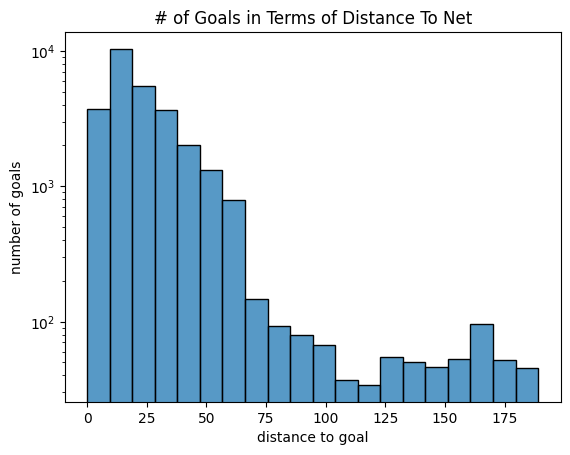

In [8]:
ax = sns.histplot(data = goals, x = 'distance_goal', bins = 20)
ax.set(title='# of Goals in Terms of Distance To Net',xlabel = 'distance to goal', ylabel='number of goals')
plt.yscale('log')
plt.show()

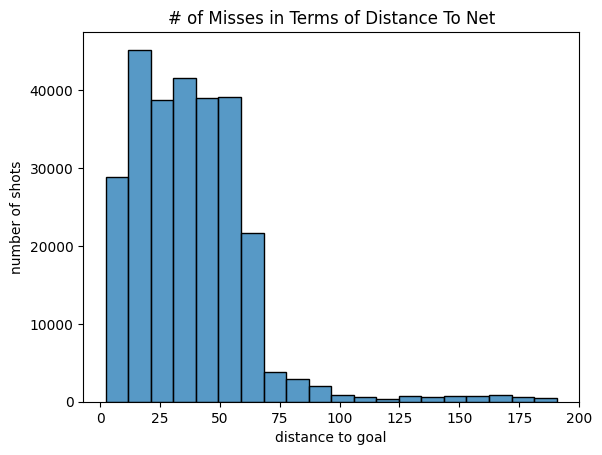

In [9]:
ax1 = sns.histplot(data = shots, x = 'distance_goal', bins = 20)
ax1.set(title='# of Misses in Terms of Distance To Net',xlabel = 'distance to goal', ylabel='number of shots')
plt.show()

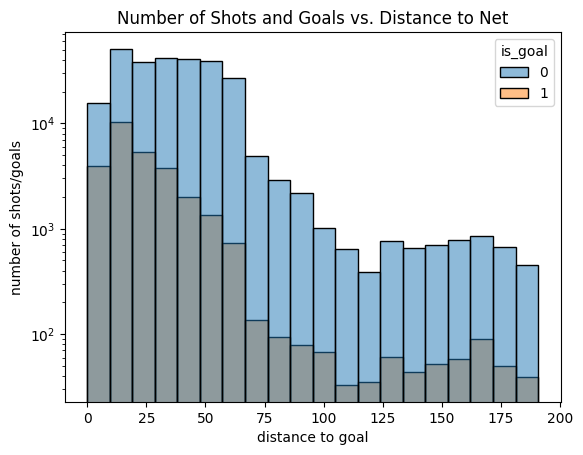

In [10]:
ax2 = sns.histplot(data = df, x = 'distance_goal', bins = 20, hue = 'is_goal')
ax2.set(title='Number of Shots and Goals vs. Distance to Net',xlabel = 'distance to goal', ylabel='number of shots/goals')
plt.yscale('log')
plt.show()

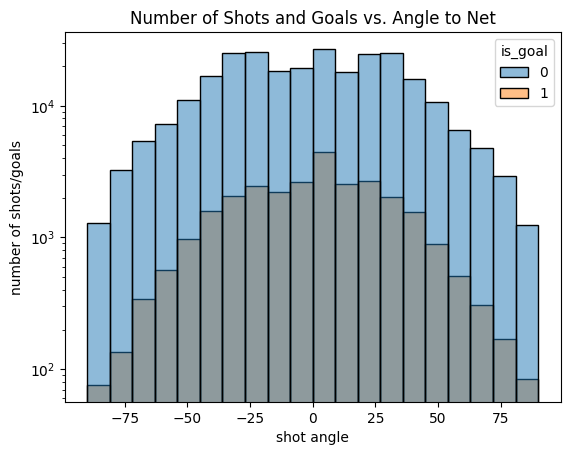

In [11]:
ax3 = sns.histplot(data = df, x = 'angle_shot', bins = 20, hue = 'is_goal')
ax3.set(title='Number of Shots and Goals vs. Angle to Net',xlabel = 'shot angle', ylabel='number of shots/goals')
plt.yscale('log')
plt.show()

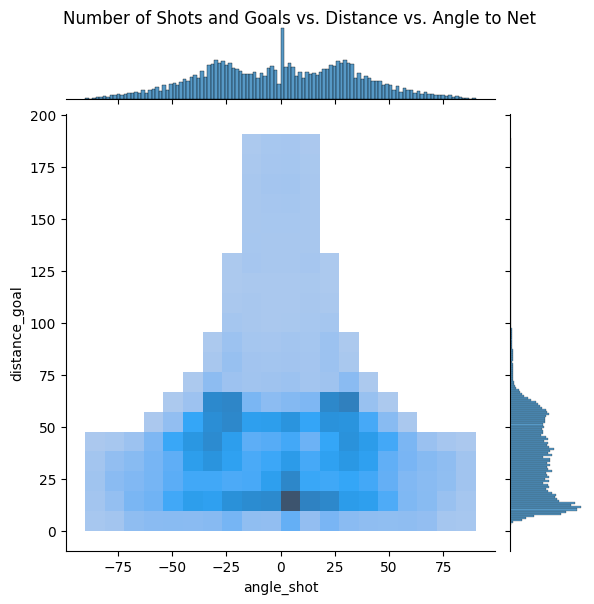

In [12]:
ax4 = sns.jointplot(data = df, x = 'angle_shot', y='distance_goal', kind = 'hist', bins = 20)
plt.suptitle('Number of Shots and Goals vs. Distance vs. Angle to Net', y=1)
plt.show()

In [13]:
df_rates = w.getProbabilities(20)
df_rates

/Users/JJKaufman/DESS/IFT6758/IFT6758-A5-NHL/ift6758/features/ingenierie.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_dist_counts = df_dist.groupby(['distance_range'])['is_goal'].count().reset_index(name = 'Total_Shots_Bin')
/Users/JJKaufman/DESS/IFT6758/IFT6758-A5-NHL/ift6758/features/ingenierie.py:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_distGoal_counts = df_dist_goals.groupby(['distance_range'])['is_goal'].count().reset_index(name = 'Total_Goals_Bin')
/Users/JJKaufman/DESS/IFT6758/IFT6758-A5-NHL/ift6758/features/ingenierie.py:91: FutureWarning: The default of observed=False is deprec

,distances,GoalDist_Rate,angles,GoalAngle_Rate
0,"[0.0, 9.532)",0.203122,"[-90.0, -81.0)",0.055434
1,"[9.532, 19.065)",0.168509,"[-81.0, -72.0)",0.039857
2,"[19.065, 28.598)",0.124588,"[-72.0, -63.0)",0.060324
3,"[28.598, 38.13)",0.081445,"[-63.0, -54.0)",0.073124
4,"[38.13, 47.662)",0.046494,"[-54.0, -45.0)",0.080715
5,"[47.662, 57.195)",0.033434,"[-45.0, -36.0)",0.086297
6,"[57.195, 66.728)",0.026216,"[-36.0, -27.0)",0.075039
7,"[66.728, 76.26)",0.027231,"[-27.0, -18.0)",0.087444
8,"[76.26, 85.792)",0.031512,"[-18.0, -9.0)",0.107578
9,"[85.792, 95.325)",0.034664,"[-9.0, 0.0)",0.120712


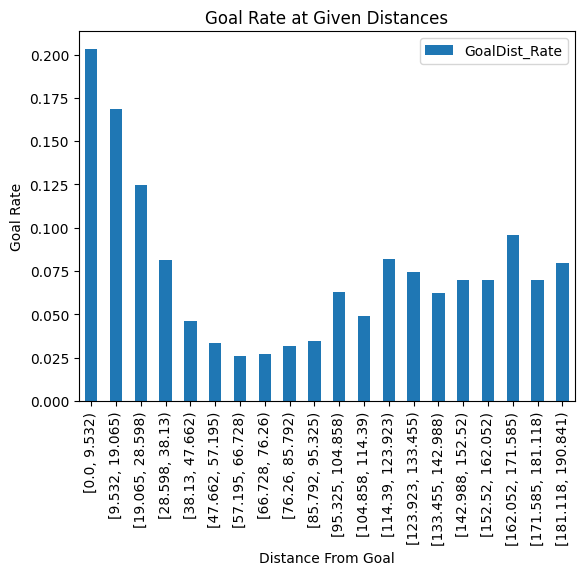

In [19]:

ax5 = df_rates.plot(x = 'distances', y = 'GoalDist_Rate', kind='bar')
ax5.set(title = 'Goal Rate at Given Distances', xlabel = 'Distance From Goal', ylabel= 'Goal Rate')
plt.show()

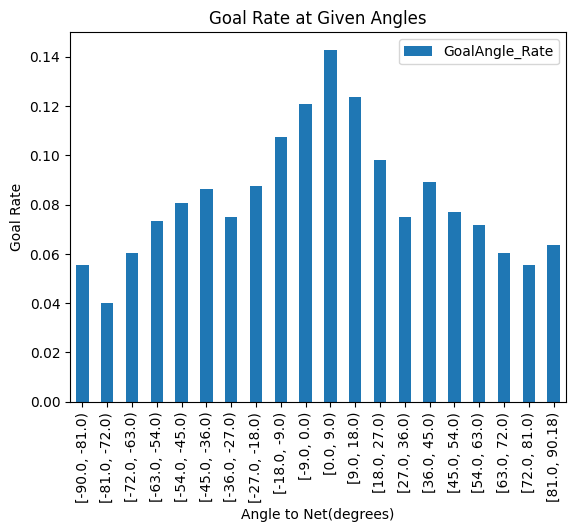

In [21]:
ax6 = df_rates.plot(x = 'angles', y = 'GoalAngle_Rate', kind='bar')
ax6.set(title = 'Goal Rate at Given Angles', xlabel = 'Angle to Net(degrees)', ylabel = 'Goal Rate')
plt.show()

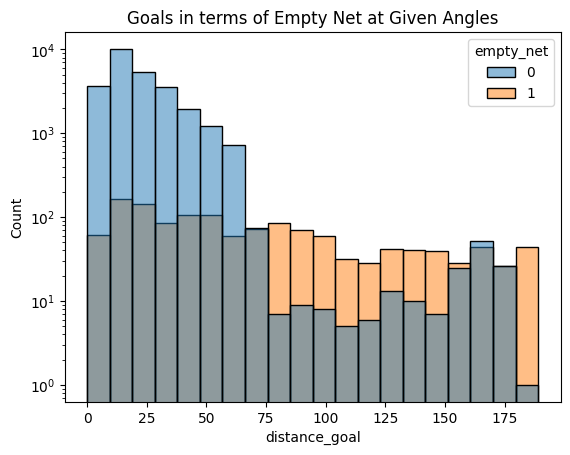

In [15]:
ax7 = sns.histplot(data = goals, x = 'distance_goal', hue = 'empty_net', bins = 20)
ax7.set(title = 'Goals in terms of Empty Net at Given Angles')
plt.yscale('log')
plt.show()